In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


collecting data

In [6]:
import pandas as pd

# Assuming your dataset is in a CSV file
df = pd.read_csv('mcdonalds.csv')

In [7]:
print(df.head())
print(df.info())
print(df.describe())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   y

In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Exploring data

In [8]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [9]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [11]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [12]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate the features and target variable
X = df.drop('Age', axis=1)
y = df['Age']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())


      yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0 -1.111479    0.318735 -0.321349   0.391375 -1.054476  0.332951  0.818605   
1  0.899702    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
2 -1.111479    0.318735  3.111884   0.391375  0.948339  0.332951 -1.221590   
3  0.899702    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
4 -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   

      tasty  expensive   healthy  disgusting      Like  VisitFrequency  \
0 -1.345528   1.339489 -0.498279   -0.566488  0.395759       -1.502741   
1  0.743203   1.339489 -0.498279   -0.566488 -1.055624       -1.502741   
2  0.743203   1.339489  2.006908   -0.566488 -1.345901       -1.502741   
3  0.743203  -0.746553 -0.498279    1.765261 -0.475071        0.775874   
4 -1.345528  -0.746553  2.006908   -0.566488 -1.055624        0.206220   

     Gender  
0 -0.918645  
1 -0.918645  
2 -0.918645  
3 -0.918645  
4  1.088560  


c:\Users\Abhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

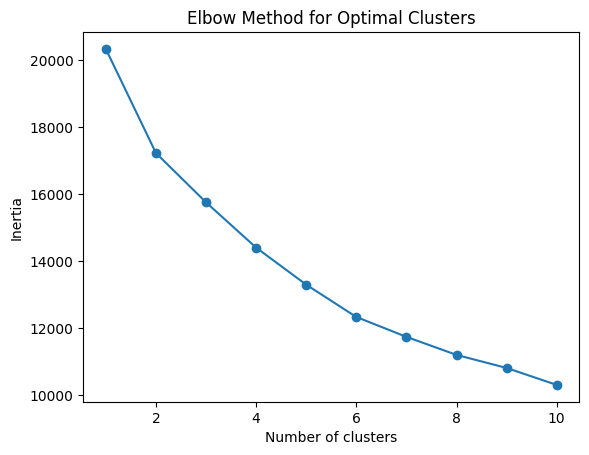

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [16]:
# Fit KMeans with the optimal number of clusters
optimal_clusters = 4  # Change this based on the Elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\Abhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
# Display cluster centers and the distribution of data points in each cluster
print(kmeans.cluster_centers_)
print(df['Cluster'].value_counts())

# Show data points with clusters
print(df.head())

[[ 0.31691704  0.08308955  0.12731241 -2.55509245 -0.88378111  0.08651243
   0.1810445   0.32783026 -0.29615785  0.99629315 -0.48699692 -0.01656564
  -0.06242339  0.09636197]
 [ 0.41530215  0.25551318  0.09733823  0.36442587  0.14843428 -0.08409879
  -0.97900548  0.3802222   1.22501106 -0.04001285 -0.29634666 -0.26355826
  -0.06123924  0.13391361]
 [-1.07411917 -0.84757695 -0.04498941  0.2636646   0.52049299 -0.43142497
  -0.3878257  -1.15799465  0.35136367 -0.42847484  1.4404045   0.77590479
   0.08805668  0.1191358 ]
 [ 0.24751436  0.28008829 -0.06358202  0.39137527 -0.09785975  0.24234582
   0.6621688   0.30610425 -0.73988868 -0.03806071 -0.45101836 -0.25759518
   0.00420236 -0.15872881]]
3    626
1    328
2    323
0    176
Name: Cluster, dtype: int64
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1       

In [18]:
# Get segment profiles
profiles = df.groupby('Cluster').mean()
print(profiles)


            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.710227    0.931818  0.130682   0.000000  0.085227  0.926136   
1        0.759146    0.981707  0.121951   0.990854  0.600610  0.875000   
2        0.018576    0.662539  0.080495   0.956656  0.786378  0.770898   
3        0.675719    0.988818  0.075080   1.000000  0.477636  0.972843   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.687500  0.801136   0.215909  0.596591    0.034091  4.579545   
1        0.118902  0.826220   0.945122  0.182927    0.115854  3.728659   
2        0.408669  0.089783   0.526316  0.027864    0.860681  7.309598   
3        0.923323  0.790735   0.003195  0.183706    0.049521  3.749201   

               Age  VisitFrequency    Gender  
Cluster                                       
0        50.1931

In [19]:
# Describe each segment
segment_description = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'yummy': 'mean',
    'convenient': 'mean',
    'spicy': 'mean',
    'fattening': 'mean',
    'greasy': 'mean',
    'fast': 'mean',
    'cheap': 'mean',
    'tasty': 'mean',
    'expensive': 'mean',
    'healthy': 'mean',
    'disgusting': 'mean',
    'Like': 'mean',
    'VisitFrequency': lambda x: x.mode()[0],  # Most common visit frequency
    'Gender': lambda x: x.mode()[0]           # Most common gender
})

print(segment_description)


               Age                yummy convenient     spicy fattening  \
              mean        std      mean       mean      mean      mean   
Cluster                                                                  
0        50.193182  13.123465  0.710227   0.931818  0.130682  0.000000   
1        41.027439  13.359617  0.759146   0.981707  0.121951  0.990854   
2        47.761610  12.816750  0.018576   0.662539  0.080495  0.956656   
3        43.279553  14.872583  0.675719   0.988818  0.075080  1.000000   

           greasy      fast     cheap     tasty expensive   healthy  \
             mean      mean      mean      mean      mean      mean   
Cluster                                                               
0        0.085227  0.926136  0.687500  0.801136  0.215909  0.596591   
1        0.600610  0.875000  0.118902  0.826220  0.945122  0.182927   
2        0.786378  0.770898  0.408669  0.089783  0.526316  0.027864   
3        0.477636  0.972843  0.923323  0.790735  0.0031

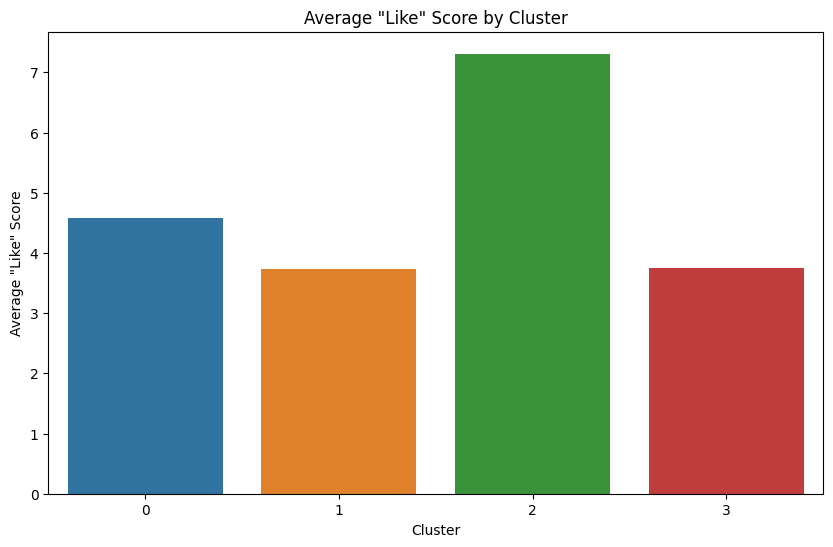

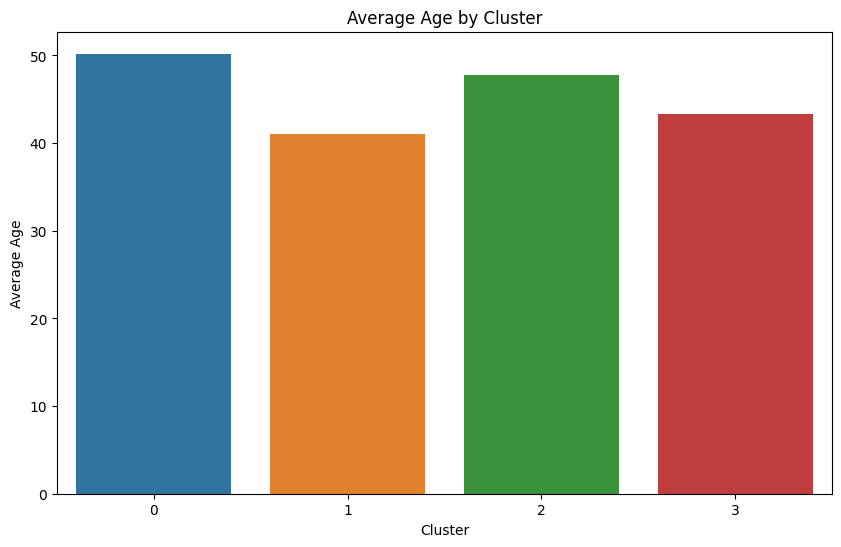

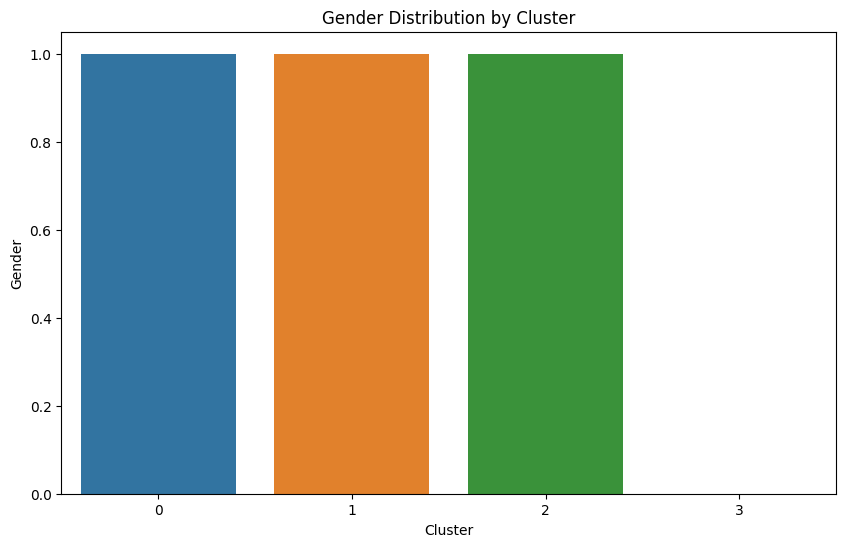

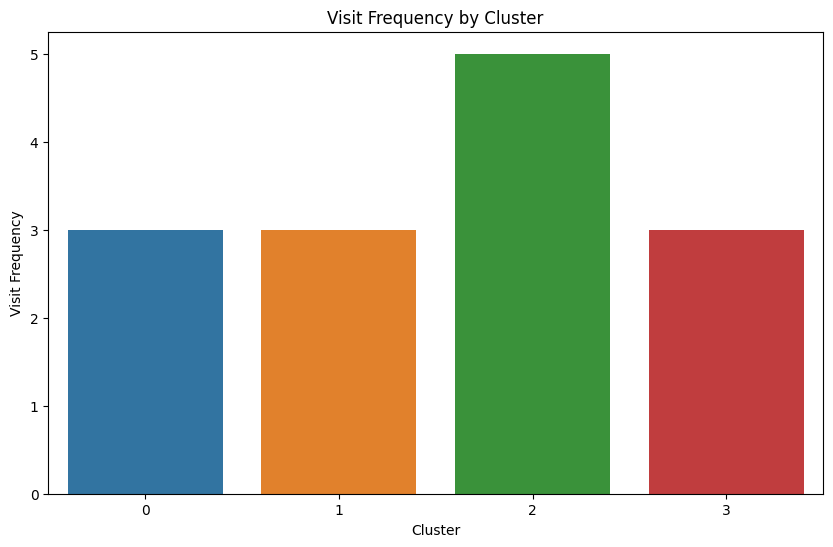

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average "Like" score by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_description.index, y=segment_description[('Like', 'mean')])
plt.xlabel('Cluster')
plt.ylabel('Average "Like" Score')
plt.title('Average "Like" Score by Cluster')
plt.show()

# Plot average age by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_description.index, y=segment_description[('Age', 'mean')])
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.title('Average Age by Cluster')
plt.show()

# Plot Gender Distribution by Cluster (assuming Gender is encoded)
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_description.index, y=segment_description[('Gender', '<lambda>')])
plt.xlabel('Cluster')
plt.ylabel('Gender')
plt.title('Gender Distribution by Cluster')
plt.show()

# Plot Visit Frequency by Cluster (assuming VisitFrequency is encoded)
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_description.index, y=segment_description[('VisitFrequency', '<lambda>')])
plt.xlabel('Cluster')
plt.ylabel('Visit Frequency')
plt.title('Visit Frequency by Cluster')
plt.show()



In [33]:
# Evaluate segments based on average 'Like' score
segment_evaluation = segment_description['Like']['mean']
print(segment_evaluation)


Cluster
0    4.579545
1    3.728659
2    7.309598
3    3.749201
Name: mean, dtype: float64


so as i can see 3 rd cluster have most visit frequency of females of age 40 to 50 and like avg is 7 which is positive thing to consider, as i have taken only aatributes of my choice we can use any attributes according to our need

Identifying Key Attributes:

Positive Segments: Segments with high average ratings on attributes like 'likes' and 'visit freq' may be considered as having a positive perception of McDonald's. This insight can help in reinforcing marketing efforts for these segments.
Negative Segments: Segments with low ratings on attributes like 'healthy' and 'expensive' might have a negative perception. This can inform strategies to address and improve these aspects.
Targeted Marketing:

Customization: For segments with positive perceptions, you might want to emphasize the attributes they value in your marketing campaigns. For instance, highlight the 'convenience' and 'taste' aspects for a segment that rates these attributes highly.
Improvement: For segments with negative perceptions, develop strategies to address the concerns. For example, if a segment perceives McDonald’s as 'fattening' or 'expensive', you might consider introducing healthier options or adjusting pricing strategies.
Strategic Decisions:

The plot provides a clear visual summary of how different segments perceive McDonald's across various attributes, aiding in strategic decision-making.
It helps in prioritizing which segments to target based on their perceptions and how to tailor your marketing mix effectively.